# Getting The Dataset

In [ ]:
# !wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_LR_unknown_X2.zip

In [ ]:
from google.colab import drive 
from google.colab import files
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!cp /content/gdrive/MyDrive/Models/Data/DIV2K_train_HR.zip /content/DIV2K_train_HR.zip

In [ ]:
!cp /content/gdrive/MyDrive/Models/Data/DIV2K_train_LR_unknown_X2.zip /content/DIV2K_train_LR_unknown_X2.zip

In [ ]:
!unzip /content/DIV2K_train_HR.zip

Archive:  /content/DIV2K_train_HR.zip
   creating: DIV2K_train_HR/
  inflating: DIV2K_train_HR/0103.png  
  inflating: DIV2K_train_HR/0413.png  
  inflating: DIV2K_train_HR/0031.png  
  inflating: DIV2K_train_HR/0660.png  
  inflating: DIV2K_train_HR/0126.png  
  inflating: DIV2K_train_HR/0793.png  
  inflating: DIV2K_train_HR/0764.png  
  inflating: DIV2K_train_HR/0550.png  
  inflating: DIV2K_train_HR/0437.png  
  inflating: DIV2K_train_HR/0374.png  
  inflating: DIV2K_train_HR/0755.png  
  inflating: DIV2K_train_HR/0614.png  
  inflating: DIV2K_train_HR/0646.png  
  inflating: DIV2K_train_HR/0371.png  
  inflating: DIV2K_train_HR/0312.png  
  inflating: DIV2K_train_HR/0108.png  
  inflating: DIV2K_train_HR/0556.png  
  inflating: DIV2K_train_HR/0794.png  
  inflating: DIV2K_train_HR/0722.png  
  inflating: DIV2K_train_HR/0780.png  
  inflating: DIV2K_train_HR/0555.png  
  inflating: DIV2K_train_HR/0439.png  
  inflating: DIV2K_train_HR/0396.png  
  inflating: DIV2K_train_HR/0666.png

In [ ]:
# !wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip

In [ ]:
!unzip /content/DIV2K_train_LR_unknown_X2.zip

Archive:  /content/DIV2K_train_LR_unknown_X2.zip
   creating: DIV2K_train_LR_unknown/X2/
  inflating: DIV2K_train_LR_unknown/X2/0261x2.png  
  inflating: DIV2K_train_LR_unknown/X2/0229x2.png  
  inflating: DIV2K_train_LR_unknown/X2/0188x2.png  
  inflating: DIV2K_train_LR_unknown/X2/0711x2.png  
  inflating: DIV2K_train_LR_unknown/X2/0187x2.png  
  inflating: DIV2K_train_LR_unknown/X2/0198x2.png  
  inflating: DIV2K_train_LR_unknown/X2/0770x2.png  
  inflating: DIV2K_train_LR_unknown/X2/0694x2.png  
  inflating: DIV2K_train_LR_unknown/X2/0001x2.png  
  inflating: DIV2K_train_LR_unknown/X2/0414x2.png  
  inflating: DIV2K_train_LR_unknown/X2/0123x2.png  
  inflating: DIV2K_train_LR_unknown/X2/0067x2.png  
  inflating: DIV2K_train_LR_unknown/X2/0538x2.png  
  inflating: DIV2K_train_LR_unknown/X2/0178x2.png  
  inflating: DIV2K_train_LR_unknown/X2/0587x2.png  
  inflating: DIV2K_train_LR_unknown/X2/0357x2.png  
  inflating: DIV2K_train_LR_unknown/X2/0598x2.png  
  inflating: DIV2K_train_LR

In [ ]:
# dataset_path = "/content/gdrive/MyDrive/Models/Data/"

In [ ]:
# files.download("/content/DIV2K_train_LR_unknown")

In [ ]:
# !cp /content/DIV2K_train_HR.zip "/content/gdrive/MyDrive/Models/Data"

In [ ]:
# !cp /content/DIV2K_train_LR_unknown_X2.zip "/content/gdrive/MyDrive/Models/Data"

In [ ]:
!rm /content/DIV2K_train_HR.zip

In [ ]:
!rm /content/DIV2K_train_LR_unknown_X2.zip

In [ ]:
!ls /content/DIV2K_train_HR | wc -l 

800


# Exploring the dataset

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [ ]:
i_hr = cv2.imread('/content/DIV2K_train_HR/0001.png')
i_hr = cv2.cvtColor(i_hr, cv2.COLOR_BGR2RGB)

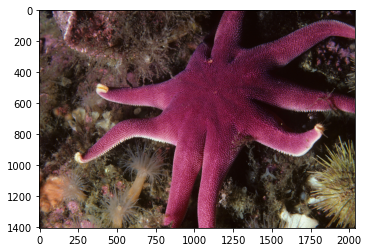

In [ ]:
plt.imshow(i_hr)

In [ ]:
i_hr.shape

(1404, 2040, 3)

In [ ]:
i_lr = cv2.imread('/content/DIV2K_train_LR_unknown/X2/0001x2.png')
i_lr = cv2.cvtColor(i_lr, cv2.COLOR_BGR2RGB)

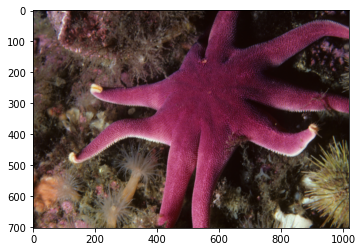

In [ ]:
plt.imshow(i_lr)

In [ ]:
i_lr.shape

(702, 1020, 3)

In [ ]:
i_hr_path = '/content/DIV2K_train_HR/'
i_lr_path = '/content/DIV2K_train_LR_unknown/X2/'

list_images_hr = os.listdir(i_hr_path)
list_images_lr = os.listdir(i_lr_path)

#Pre Processing On data

In [ ]:
import os

In [ ]:
hr_patches = []
lr_patches = []
PATCH_SIZE = 100
SCALING_FACTOR = 2
STRIDE = 200

In [ ]:
from typing import List, Tuple

PatchPairs = List[Tuple[np.ndarray]]
def generate_patches(i_lr: np.ndarray, i_hr: np.ndarray, stride: int, patch_size: int, random_cropping: bool = False, random_patch_count = 1) -> PatchPairs:
  lr_height, lr_width = i_lr.shape[0], i_lr.shape[1]
  patches = []
  scaling_factor = int(i_hr.shape[0]/i_lr.shape[0])
  if random_cropping:
    for i in range(random_patch_count):
      j = np.random.random_integers(0, lr_height - patch_size + 1)
      k = np.random.random_integers(0, lr_width - patch_size + 1)
      i_lr_patch = i_lr[j:j+patch_size, k:k+patch_size]
      i_hr_patch = i_hr[(j*scaling_factor):(j*scaling_factor)+(patch_size*scaling_factor), (k*scaling_factor):(k*scaling_factor)+(patch_size*scaling_factor)]
      patches.append((i_lr_patch,i_hr_patch))    
  else:
    for j in range(0, lr_height - patch_size + 1, stride):
      for k in range(0, lr_width - patch_size + 1, stride):
        i_lr_patch = i_lr[j:j+patch_size, k:k+patch_size]
        i_hr_patch = i_hr[(j*scaling_factor):(j*scaling_factor)+(patch_size*scaling_factor), (k*scaling_factor):(k*scaling_factor)+(patch_size*scaling_factor)]
        patches.append((i_lr_patch,i_hr_patch))
  return patches

In [ ]:
hr_image_path = '/content/DIV2K_train_HR/'
lr_image_path = '/content/DIV2K_train_LR_unknown/X2/'

In [ ]:
list_images_hr = os.listdir(hr_image_path)
list_images_lr = os.listdir(lr_image_path)
print(list_images_hr)
print(list_images_lr)

['0223.png', '0693.png', '0461.png', '0497.png', '0098.png', '0551.png', '0439.png', '0260.png', '0401.png', '0311.png', '0206.png', '0162.png', '0138.png', '0733.png', '0779.png', '0636.png', '0423.png', '0233.png', '0764.png', '0458.png', '0427.png', '0344.png', '0350.png', '0769.png', '0104.png', '0508.png', '0772.png', '0584.png', '0322.png', '0193.png', '0697.png', '0131.png', '0465.png', '0736.png', '0398.png', '0570.png', '0336.png', '0114.png', '0440.png', '0794.png', '0413.png', '0407.png', '0286.png', '0490.png', '0102.png', '0198.png', '0207.png', '0626.png', '0723.png', '0558.png', '0108.png', '0146.png', '0443.png', '0318.png', '0506.png', '0597.png', '0635.png', '0103.png', '0726.png', '0454.png', '0109.png', '0742.png', '0414.png', '0142.png', '0674.png', '0701.png', '0082.png', '0319.png', '0778.png', '0369.png', '0535.png', '0428.png', '0173.png', '0444.png', '0089.png', '0410.png', '0460.png', '0308.png', '0248.png', '0005.png', '0213.png', '0495.png', '0513.png', '02

In [ ]:
lr_patches = []
hr_patches = []

In [ ]:
# patches = generate_patches(i_lr, i_hr, STRIDE, PATCH_SIZE, random_cropping=True)
i = 0
for i in range(25):

  hr_image = cv2.imread(hr_image_path + list_images_hr[i])
  # hr_image = hr_image / 255

  lr_image = cv2.imread(lr_image_path + list_images_hr[i].split(".")[0] + "x2.png")
  # lr_image = lr_image / 255
  # print(lr_image_path + list_images_hr[i].split(".")[0] + "x2.png")
  
  lr_image = cv2.cvtColor(lr_image, cv2.COLOR_BGR2RGB)
  hr_image = cv2.cvtColor(hr_image, cv2.COLOR_BGR2RGB)
  patches = generate_patches(i_lr, i_hr, STRIDE, PATCH_SIZE)
  for patch_pair in patches:
    lr_patches.append(patch_pair[0])
    hr_patches.append(patch_pair[1])
    

In [ ]:
lr_patches = np.asarray(lr_patches)
hr_patches = np.asarray(hr_patches)

In [ ]:
print(lr_patches.shape)
print(hr_patches.shape)

(500, 100, 100, 3)
(500, 200, 200, 3)


In [ ]:
# lr_image = lr_image / 255
# height, width = lr_image.shape[0], lr_image.shape[1]

# for j in range(0, height - lr_patch_size + 1, lr_stride):
#     for k in range(0, width - lr_patch_size + 1, lr_stride):
#       if (lr_patch_size + j > lr_image.shape[0]) or (lr_patch_size + k > lr_image.shape[1]):
#         continue
      
#       patch = lr_image[j:j+lr_patch_size, k:k+lr_patch_size]
#       lr_patches.append(patch)


In [ ]:
# lr_patches = np.asarray(lr_patches)
# lr_patches = np.reshape(lr_patches, (lr_patches.shape[0], lr_patches.shape[1], lr_patches.shape[2], 3))

In [ ]:
# lr_patches.shape

In [ ]:
# height, width = hr_image.shape[0], hr_image.shape[1]
# # patch_size = 200

# for j in range(0, height - hr_patch_size + 1, hr_stride):
#     for k in range(0, width - hr_patch_size + 1, hr_stride):
#       if (hr_patch_size + j > hr_image.shape[0]) or (hr_patch_size + k > hr_image.shape[1]):
#         continue
      
#       patch = hr_image[j:j+hr_patch_size, k:k+hr_patch_size]
#       hr_patches.append(patch)


In [ ]:
# hr_patches = np.asarray(hr_patches)
# hr_patches = np.reshape(hr_patches, (hr_patches.shape[0], hr_patches.shape[1], hr_patches.shape[2], 3))

In [ ]:
# hr_patches.shape

In [ ]:
# lr_patches.shape

In [ ]:
# lr_patches[1].shape

In [ ]:
# plt.imshow(lr_patches[1])

In [ ]:
# plt.imshow(hr_patches[1])

In [ ]:
# hr_patches[1].shape

In [ ]:
# patches = []
# noisy_patches = []
# patch_size = 100
# stride = 100
# scaling_factor = 2

# for i in range(25):
#   i_hr = cv2.imread(i_hr_path + list_images_hr[i])
#   i_hr = cv2.cvtColor(i_hr, cv2.COLOR_BGR2RGB)
#   i_hr = i_hr / 255
#   height, width = i_hr.shape[0], i_hr.shape[1]

#   i_lr = cv2.imread(i_lr_path + list_images_hr[i].split(".")[0] + "x2.png")
#   i_lr = cv2.cvtColor(i_lr, cv2.COLOR_BGR2RGB)
#   i_lr = i_lr / 255
#   i_lr = cv2.resize(i_lr, dsize = (width, height), interpolation=cv2.INTER_CUBIC)
#   # print(i_lr.shape == i_hr.shape)

#   for j in range(0, height - patch_size + 1, stride):
#     for k in range(0, width - patch_size + 1, stride):
#       if (patch_size + j > i_lr.shape[0]) or (patch_size + k > i_lr.shape[1]):
#         continue
      
#       patch = i_lr[j:j+patch_size, k:k+patch_size]
#       noisy_patches.append(patch)

#       patch = i_hr[j:patch_size + j, k:patch_size + k]
#       patches.append(patch)    



In [ ]:
# type(i_hr)
# print(i_hr.shape)

In [ ]:
# temp = i_lr
# temp[temp < 0] = 0
# temp[temp > 1] = 1

In [ ]:
# plt.imsave("temp_image.png", temp)

In [ ]:
# plt.imshow(i_hr)

In [ ]:
# from PIL import Image
# plt.imsave("i_hr.png", i_hr)
# plt.imsave("i_lr.png", i_lr)

In [ ]:
# plt.savefig('i_hr.png')

In [ ]:
# plt.imshow(i_lr)

In [ ]:
# patches = np.asarray(patches)
# patches = np.reshape(patches, (patches.shape[0], patches.shape[1], patches.shape[2], 3))

# noisy_patches = np.asarray(noisy_patches)
# noisy_patches = np.reshape(noisy_patches, (noisy_patches.shape[0], noisy_patches.shape[1], noisy_patches.shape[2], 3))

In [ ]:
# print(patches.shape)
# print(noisy_patches.shape)

In [ ]:
# random_seed = 34
# plt.imshow(np.reshape(patches[random_seed], (patches[random_seed].shape[0], patches[random_seed].shape[1], 3)))

In [ ]:
# plt.imshow(np.reshape(noisy_patches[random_seed], (noisy_patches[random_seed].shape[0], noisy_patches[random_seed].shape[1], 3)))

# Defining the model

In [ ]:
import tensorflow.keras as keras
from keras.utils.vis_utils import plot_model
from keras.layers import  BatchNormalization
import math

In [ ]:
input = keras.layers.Input((100, 100, 3))
# comparator = keras.models.Sequential()

x1 = keras.layers.Conv2D(kernel_size=(3,3), filters = 512, input_shape=(100, 100, 3), activation='relu', padding = "same")(input)
x = keras.layers.Concatenate()([input,x1])
x2 = keras.layers.Conv2D(kernel_size=(3,3), filters = 256, activation='relu', padding = "same")(x)
x = keras.layers.Concatenate()([input, x1, x2])
x3 = keras.layers.Conv2D(kernel_size=(3,3), filters = 128, activation='relu', padding = "same")(x)
x = keras.layers.Concatenate()([input, x1, x2, x3])
x4 = keras.layers.Conv2DTranspose(filters = 128, kernel_size = (3,3), padding = "same", strides = (2,2), activation = "relu")(x)
x5 = keras.layers.Conv2D(kernel_size=(3,3), filters = 64, activation='relu', padding = "same")(x4)
x6 = keras.layers.Conv2D(kernel_size=(3,3), filters = 32, activation='relu', padding = "same")(x5)
x7 = keras.layers.Conv2D(kernel_size=(3,3), filters = 3, activation='relu', padding = "same")(x6)

# x3.add(keras.layers.Conv2D(kernel_size=(3,3), filters = 64, activation='relu', padding = "same"))
# print(x1.shape, x2.shape)
# x = keras.layers.Concatenate()([input, x1, x2, x3])
# transposeNet = keras.models.Model(inputs=input, outputs=x3)

# transposeNet.add(keras.layers.Conv2D(kernel_size=(3,3), filters = 64, activation='relu', padding = "same"))
# x4 = keras.layers.Conv2D(kernel_size=(3,3), filters = 64, activation='relu', padding = "same")
# x = keras.layers.Concatenate()([input, x1, x2, x3, x4])
# x5 = keras.layers.Conv2D(kernel_size=(3,3), filters = 16, activation='relu', padding = "same")
# x = keras.layers.Concatenate()([input, x1, x2, x3, x4, x5])
# x = keras.layers.Conv2D(kernel_size=(3,3), filters = 3, activation='relu', padding = "same")

In [ ]:
transposeNet = keras.models.Model(inputs=input, outputs=x7)

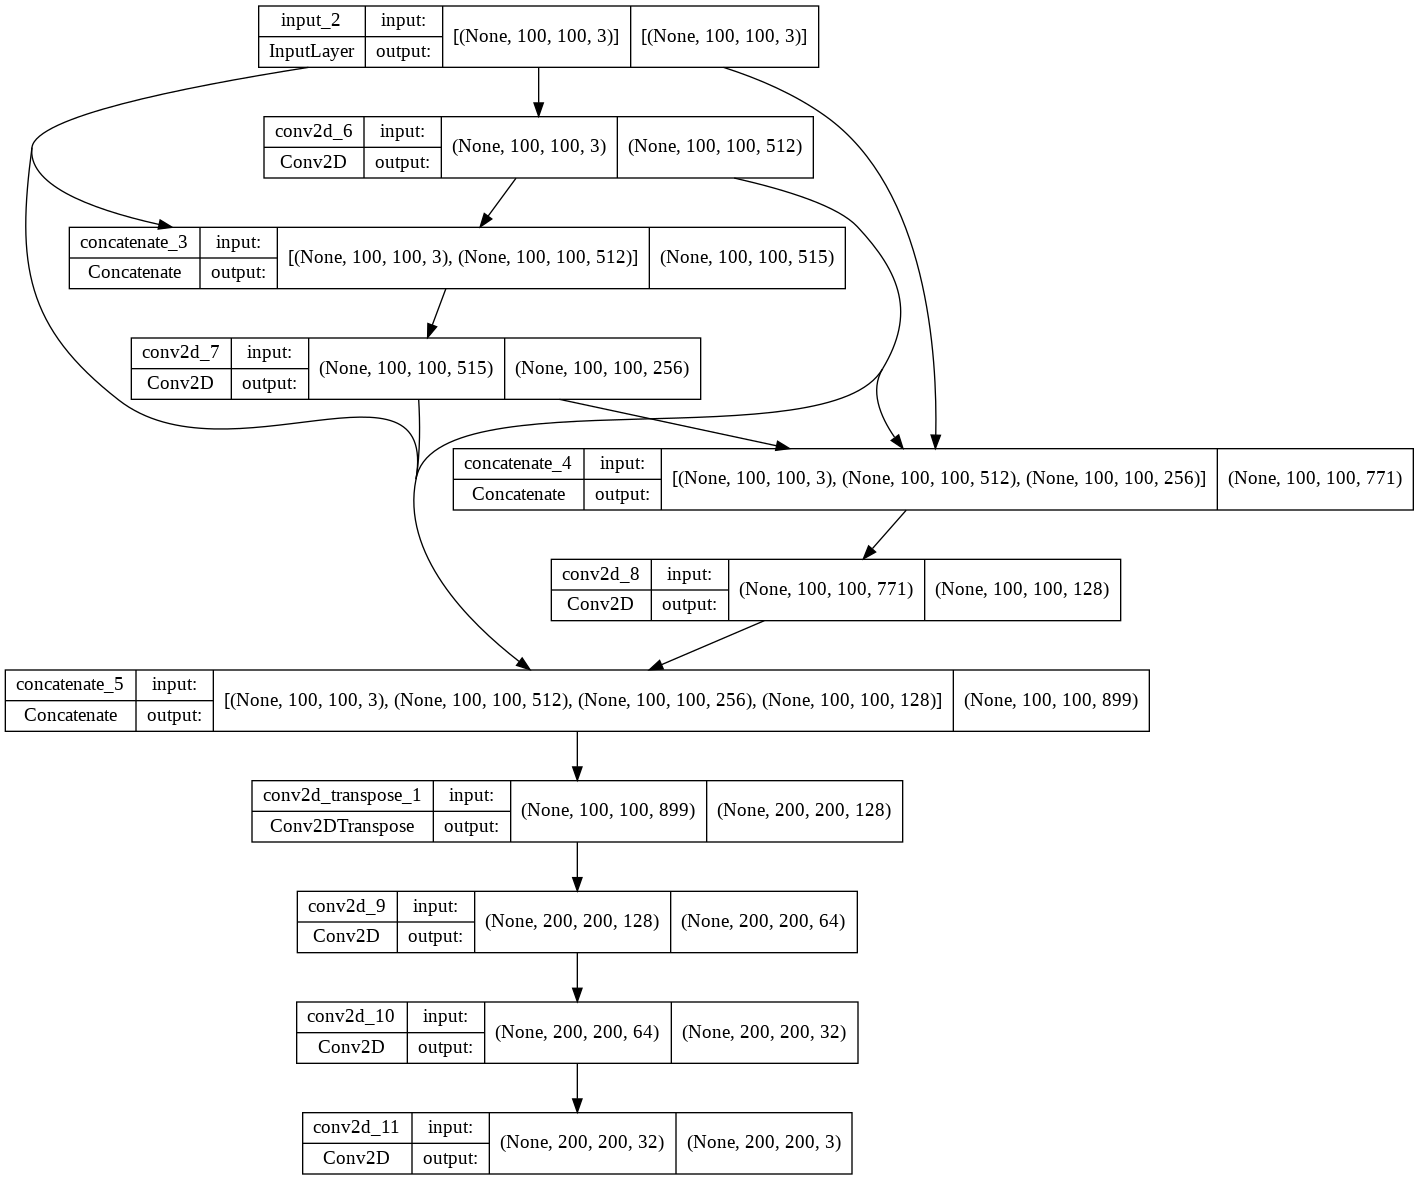

In [ ]:
plot_model(transposeNet, show_shapes=True)

In [ ]:
transposeNet.compile(loss=["mse"], optimizer=keras.optimizers.Adam(learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam"))

# Training the model

In [ ]:
from keras.callbacks import LearningRateScheduler

In [ ]:
# def step_decay(epoch, lr):
#   initial_lr = 1e-3
#   if epoch<150:
#     lr = initial_lr
#   else:
#     lr = lr/10
    
#   return lr

def step_decay(epoch, lr):
	initial_lrate = 0.001
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

In [ ]:
checkpoint_path = "/content/gdrive/MyDrive/Models/SRCNN_Transpose/"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
lrs = LearningRateScheduler(step_decay)

In [ ]:
transposeNet.load_weights(checkpoint_path)

In [ ]:
# print(noisy_patches.shape, patches.shape)

In [ ]:
# comparator.fit(lr_patches, hr_patches, batch_size = 128, epochs = 50, callbacks = [lrs, cp_callback], verbose = 1)
transposeNet.fit(lr_patches, hr_patches, batch_size = 25, epochs = 200, callbacks = [cp_callback, lrs], verbose = 1)

Epoch 1/200
20/20 [==============================] - ETA: 0s - loss: 4920.3760
Epoch 1: saving model to /content/gdrive/MyDrive/Models/SRCNN_Transpose/
20/20 [==============================] - 69s 2s/step - loss: 4920.3760 - lr: 0.0010
Epoch 2/200
20/20 [==============================] - ETA: 0s - loss: 685.8601
Epoch 2: saving model to /content/gdrive/MyDrive/Models/SRCNN_Transpose/
20/20 [==============================] - 43s 2s/step - loss: 685.8601 - lr: 0.0010
Epoch 3/200
20/20 [==============================] - ETA: 0s - loss: 422.6838
Epoch 3: saving model to /content/gdrive/MyDrive/Models/SRCNN_Transpose/
20/20 [==============================] - 43s 2s/step - loss: 422.6838 - lr: 0.0010
Epoch 4/200
20/20 [==============================] - ETA: 0s - loss: 300.4561
Epoch 4: saving model to /content/gdrive/MyDrive/Models/SRCNN_Transpose/
20/20 [==============================] - 43s 2s/step - loss: 300.4561 - lr: 0.0010
Epoch 5/200
20/20 [==============================] - ETA: 0s -

KeyboardInterrupt: ignored

# Predictions

In [ ]:
lr_patch = patches[0][0]

In [ ]:
lr_patch.shape

(100, 100, 3)

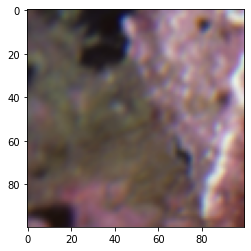

In [ ]:
plt.imshow(lr_patch)

In [ ]:
lr_patch = lr_patch / 255

In [ ]:
lr_predicted = transposeNet.predict(lr_patch.reshape(1, 100, 100, 3))

In [ ]:
lr_predicted.shape

(1, 200, 200, 3)

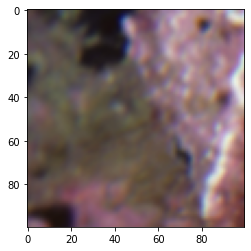

In [ ]:
plt.imshow(lr_patch)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


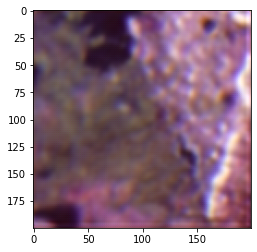

In [ ]:
plt.imshow(lr_predicted.reshape(200, 200, 3))

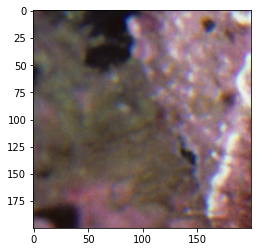

In [ ]:
plt.imshow(patches[0][1])